In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
iris = pd.read_csv('iris_cleaned.csv', index_col=0)

In [6]:
# iris = iris.drop(['Unnamed: 0'], axis=1)

In [5]:
# iris.iloc[:,0:4]

## 准备训练集和测试集

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
(train_x, test_x, train_y, test_y) = train_test_split(iris.iloc[:,0:4].values, iris['class'].values, train_size=0.7, random_state=1)

## 定义模型

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
iris_clf = DecisionTreeClassifier()

In [43]:
print(iris_clf)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


## 模型训练

In [44]:
iris_clf.fit(train_x, train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [46]:
iris_clf.get_params(deep=True)

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': None,
 'splitter': 'best'}

## 评估模型

In [47]:
iris_clf.score(test_x, test_y)

0.9555555555555556

## 特征重要性

In [48]:
iris_clf.feature_importances_

array([ 0.02146947,  0.02146947,  0.57196476,  0.38509631])

## 交叉检验

In [63]:
model_accr = []

for i in range(100):
    (train_x, test_x, train_y, test_y) = \
    train_test_split(iris.iloc[:,0:4].values, iris['class'].values, train_size=0.7)
    
    clf = DecisionTreeClassifier()
    clf.fit(train_x, train_y)
    clf_accr = clf.score(test_x, test_y)
    model_accr.append(clf_accr)

In [25]:
import seaborn as sns

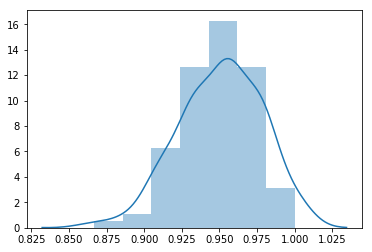

In [64]:
sns.distplot(model_accr)

In [13]:
import numpy as np
from sklearn.cross_validation import StratifiedKFold

In [16]:
def plot_cv(cv, n_samples):
    masks = []
    for train, test in cv:
        mask = np.zeros(n_samples, dtype=bool)
        mask[test] = 1
        masks.append(mask)
        
    plt.figure(figsize=(15, 15))
    plt.imshow(masks, interpolation='none')
    plt.ylabel('Fold')
    plt.xlabel('Row#')

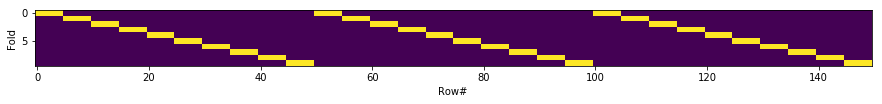

In [17]:
plot_cv(StratifiedKFold(iris['class'].values, n_folds=10), len(iris['class'].values))

In [19]:
np.zeros(10, dtype=bool)

array([False, False, False, False, False, False, False, False, False, False], dtype=bool)

In [12]:
from sklearn.cross_validation import cross_val_score

In [23]:
clf = DecisionTreeClassifier()

In [26]:
cv_scores = cross_val_score(clf, iris.iloc[:,0:4].values, iris['class'].values, cv=10)

Text(0.5,1,'average score:0.9533333333333334')

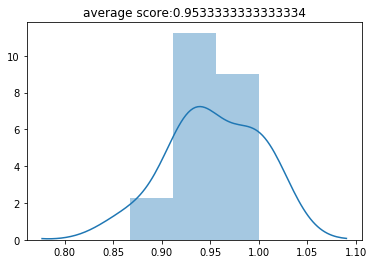

In [30]:
sns.distplot(cv_scores)
plt.title("average score:{}".format(np.mean(cv_scores)))

## 调参

In [14]:
from sklearn.grid_search import GridSearchCV

In [10]:
clf = DecisionTreeClassifier()

In [11]:
parameter_grid = {
    'max_depth': [1, 2, 3, 4, 5],
    'max_features': [1, 2, 3, 4]
}

In [15]:
cross_val = StratifiedKFold(iris['class'].values, n_folds=10)

In [16]:
grid_search = GridSearchCV(clf, param_grid=parameter_grid,
                          cv=cross_val)

In [17]:
grid_search.fit(iris.iloc[:,0:4].values, iris['class'].values)

GridSearchCV(cv=sklearn.cross_validation.StratifiedKFold(labels=['Iris-setosa' 'Iris-setosa' ..., 'Iris-virginica' 'Iris-virginica'], n_folds=10, shuffle=False, random_state=None),
       error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 2, 3, 4, 5], 'max_features': [1, 2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [18]:
grid_search.best_score_

0.9666666666666667

In [19]:
grid_search.best_params_

{'max_depth': 5, 'max_features': 3}

Text(33,0.5,'max_depth')

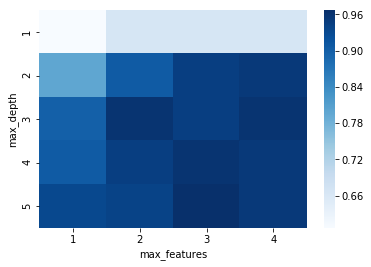

In [32]:
grid_visual = []

for grid_pair in grid_search.grid_scores_:
    grid_visual.append(grid_pair.mean_validation_score)
    
grid_visual = np.array(grid_visual)
grid_visual.shape = (5,4)
sns.heatmap(grid_visual, cmap='Blues')
plt.xticks(np.arange(4)+0.5, grid_search.param_grid['max_features'])
plt.yticks(np.arange(5)+0.5, grid_search.param_grid['max_depth'][::1])
plt.xlabel('max_features')
plt.ylabel('max_depth')

In [37]:
## conclusion
'''
clf = DecisionTreeClassifier()

parameter_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter:': ['best', 'random'],
    'max_depth': [1, 2, 3, 4, 5],
    'max_features': [1, 2, 3, 4]
}

cross_val = StratifiedKFold(iris['class'].values, n_folds=10)

grid_search = GridSearchCV(clf, param_grid=parameter_grid,
                          cv=cross_val)
grid_search.fit(iris.iloc[:,0:4].values, iris['class'].values)
print(grid_search.best_score_)
print(grid_search.best_params_)
'''

"\nclf = DecisionTreeClassifier()\n\nparameter_grid = {\n    'criterion': ['gini', 'entropy'],\n    'splitter:': ['best', 'random'],\n    'max_depth': [1, 2, 3, 4, 5],\n    'max_features': [1, 2, 3, 4]\n}\n\ncross_val = StratifiedKFold(iris['class'].values, n_folds=10)\n\ngrid_search = GridSearchCV(clf, param_grid=parameter_grid,\n                          cv=cross_val)\ngrid_search.fit(iris.iloc[:,0:4].values, iris['class'].values)\nprint(grid_search.best_score_)\nprint(grid_search.best_params_)\n"

## 集成学习

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
rf_clf = RandomForestClassifier()

In [40]:
parameter_grid = {
    'n_estimators': [5, 10, 25, 50],
    'criterion': ['gini', 'entropy'],
    'max_features': [1, 2, 3, 4],
    'warm_start': [True, False]
}

In [41]:
cross_val = StratifiedKFold(iris['class'].values, n_folds=10)

In [46]:
grid_search = GridSearchCV(rf_clf,
                           param_grid=parameter_grid,
                           cv=cross_val)

In [50]:
grid_search.fit(iris.iloc[:,0:4].values, iris['class'].values)

GridSearchCV(cv=sklearn.cross_validation.StratifiedKFold(labels=['Iris-setosa' 'Iris-setosa' ..., 'Iris-virginica' 'Iris-virginica'], n_folds=10, shuffle=False, random_state=None),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [5, 10, 25, 50], 'criterion': ['gini', 'entropy'], 'max_features': [1, 2, 3, 4], 'warm_start': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [51]:
grid_search.best_score_

0.9733333333333334

In [52]:
grid_search.best_params_

{'criterion': 'gini',
 'max_features': 1,
 'n_estimators': 10,
 'warm_start': True}

In [53]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=1, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0, warm_start=True)

## 模型可视化

In [54]:
import sklearn.tree as tree
from sklearn.externals.six import StringIO

In [57]:
clf = DecisionTreeClassifier()
clf.fit(iris.iloc[:,0:4].values, iris['class'].values)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

第一种方法

In [59]:
with open('iris_dtc.dot', 'w') as out_file:
    out_file = tree.export_graphviz(clf, out_file=out_file)

第二种方法

In [61]:
import pydotplus

In [62]:
from IPython.display import Image

In [75]:
dot_data = tree.export_graphviz(clf, out_file=None,
                               feature_names=iris.columns[0:4],
                               class_names=iris['class'].unique(),
                               filled=True, rounded=True,
                               special_characters=True)

In [76]:
graph = pydotplus.graph_from_dot_data(dot_data)

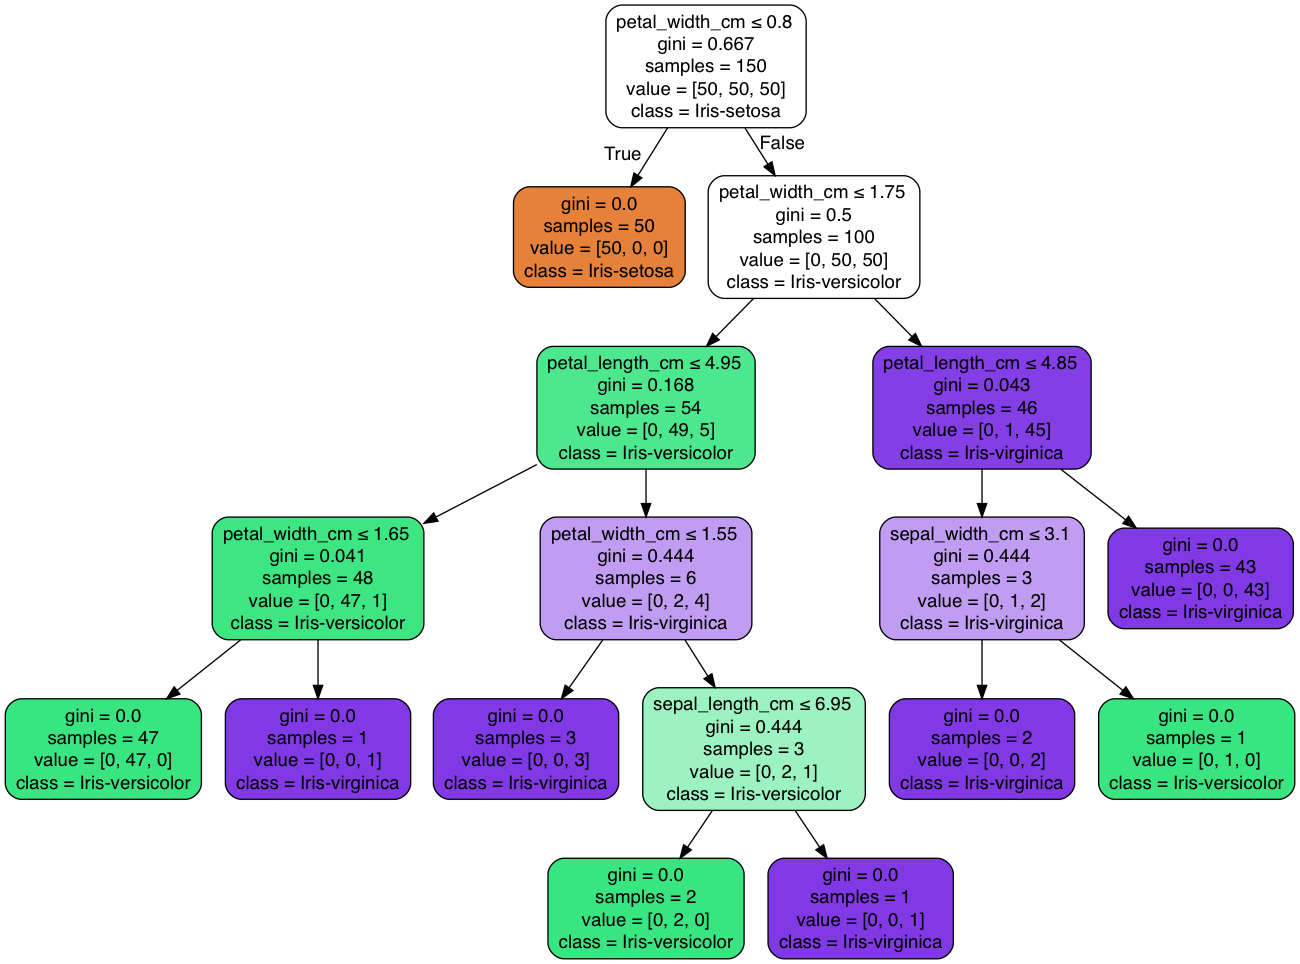

In [78]:
Image(graph.create_png())

第三种方法

In [79]:
from sklearn.externals.six import StringIO

In [80]:
dot_data = StringIO()

In [81]:
tree.export_graphviz(clf, out_file=dot_data,
                     feature_names=iris.columns[0:4],
                     class_names=iris['class'].unique(),
                     filled=True, rounded=True,
                     special_characters=True)

In [82]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

In [83]:
graph.write_pdf("WineTree.pdf")

True